In [52]:
# Pandas es una biblioteca de Python que proporciona estructuras de datos y herramientas de análisis de datos flexibles y eficientes.
import pandas as pd  

# NumPy es una biblioteca fundamental para cálculos numéricos en Python, especialmente para operaciones con matrices y arreglos.
import numpy as np  
from sklearn.tree import plot_tree
# Matplotlib es una biblioteca de visualización de datos en Python que permite crear una variedad de gráficos estáticos, como gráficos de líneas, histogramas, gráficos de dispersión, etc.
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Seaborn es una biblioteca de visualización de datos en Python basada en Matplotlib, que proporciona una interfaz de alto nivel para crear gráficos estadísticos atractivos.
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
"""Cargamos el archivo"""
df = pd.read_csv('winequality-red.csv')

In [8]:
"""Primeras filas"""
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [10]:
"""Manejar datos faltantes"""
"""Verificar la presencia de valores nulos en el DataFrame"""
missing_values = df.isnull().sum()

"""Si hay datos faltantes, existen varias opciones para abordarlos, como imputarlos con la media, la mediana o una constante, o eliminar las filas/columnas con datos faltantes."""

df_filled = df.fillna(df.mean())

"""Para eliminar las filas con datos faltantes:"""
df_clean = df.dropna()



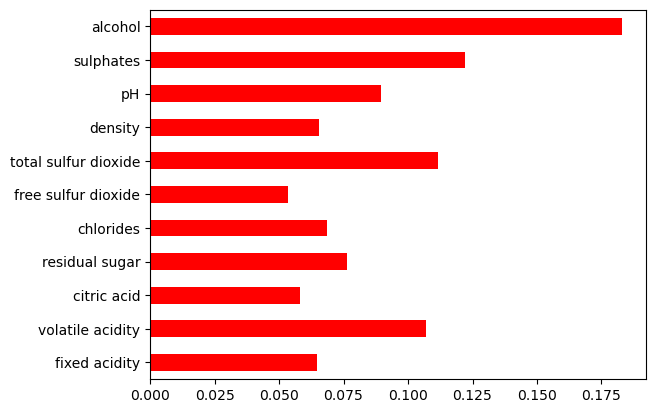

In [13]:
"""Evaluar la importancia de las características utilizando un Árbol de Decisión"""
from sklearn.tree import DecisionTreeClassifier

"""Suponiendo que 'quality' es la variable objetivo"""
X = df.drop('quality', axis=1)
y = df['quality']

"""Instanciar y ajustar el modelo de Árbol de Decisión"""
model = DecisionTreeClassifier()
model.fit(X, y)

"""Importancia de las características"""
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.plot(kind='barh', color='red') 
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
""" Modelo"""
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [20]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

"""Métricas de evaluación del modelo"""
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # especificar 'weighted' para clasificación multiclase
recall = recall_score(y_test, y_pred, average='weighted')  # especificar 'weighted' para clasificación multiclase
f1 = f1_score(y_test, y_pred, average='weighted')  # especificar 'weighted' para clasificación multiclase

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.55625
Precision: 0.5527651442675647
Recall: 0.55625
F1 Score: 0.5534883001068103


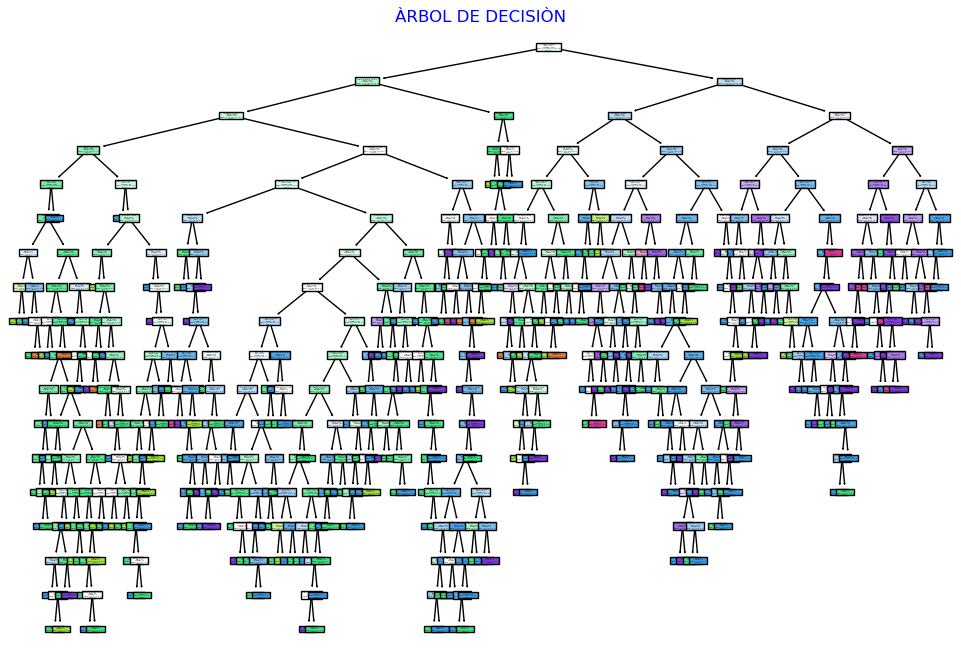

In [34]:
"""Transformar las clases en strings"""
class_names_str = [str(c) for c in y.unique()]

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=class_names_str)
plt.title('ÀRBOL DE DECISIÒN', color= "Blue")
plt.show()

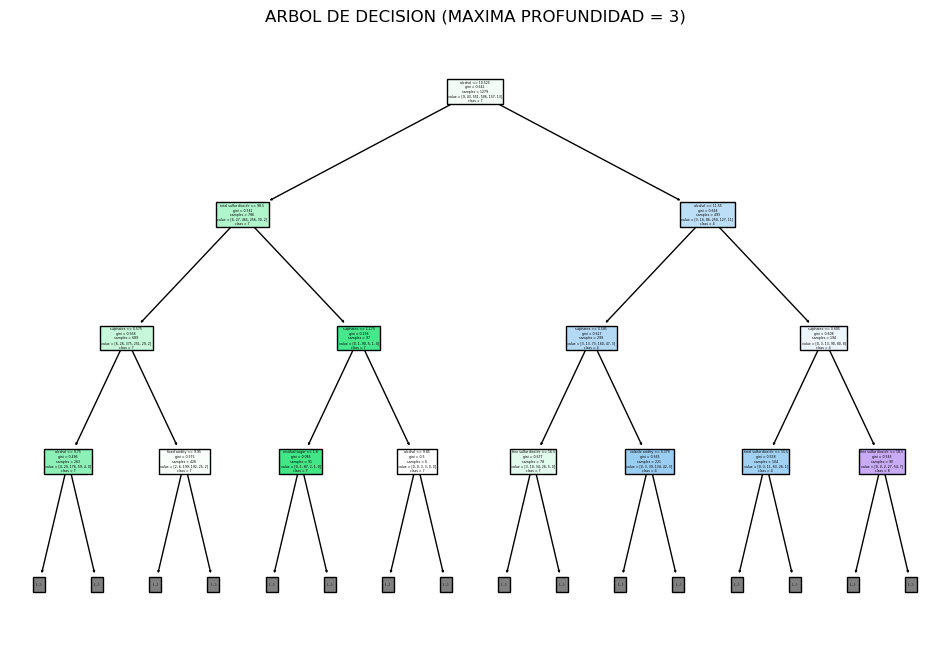

In [49]:
"""Maxima profundidad"""
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=class_names_str, max_depth=3)
plt.title('ARBOL DE DECISION (MAXIMA PROFUNDIDAD = 3)')
plt.show()

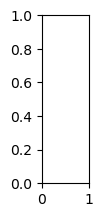

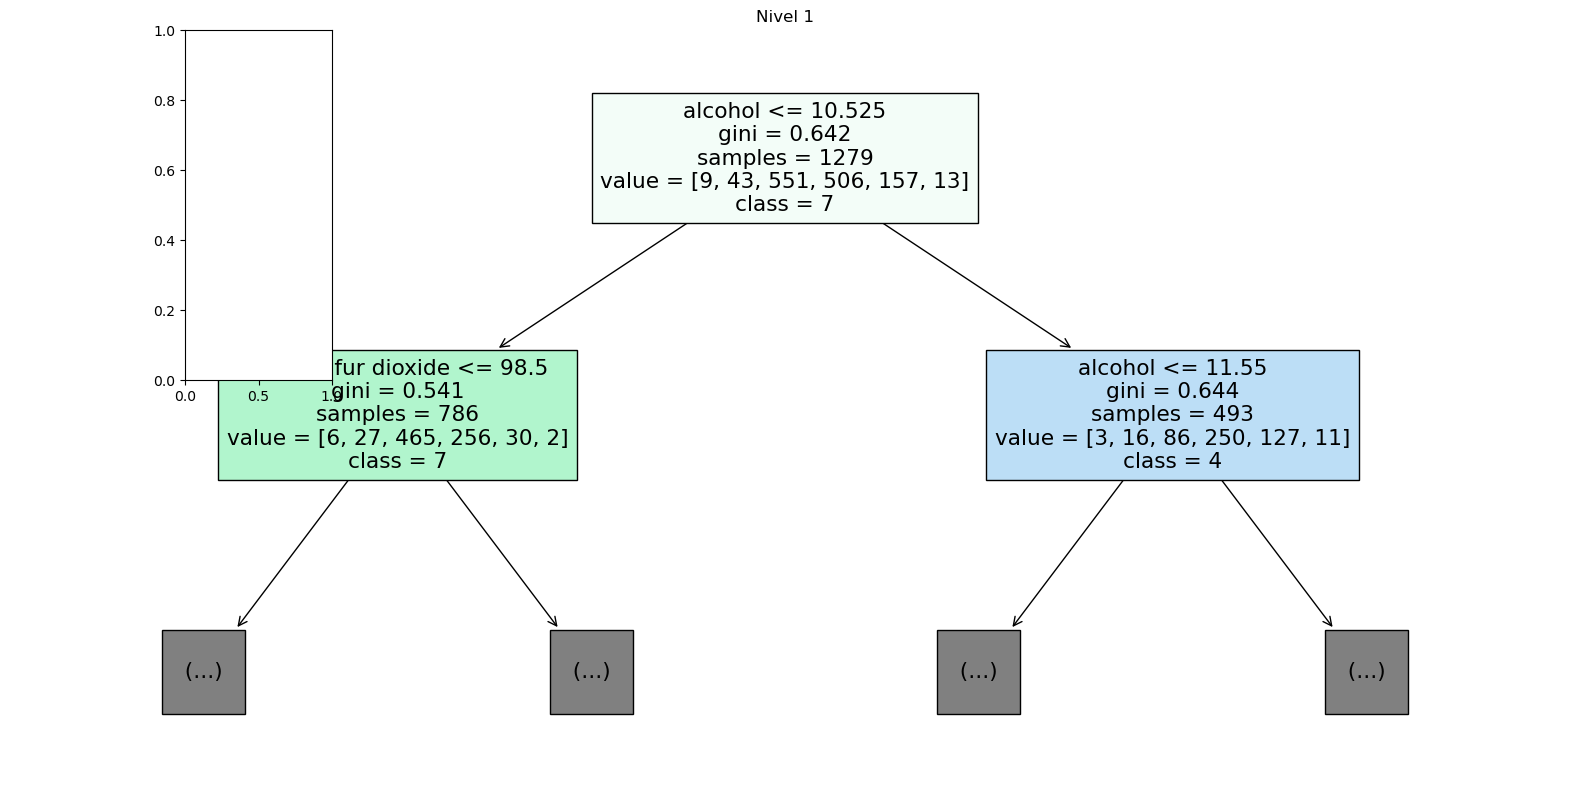

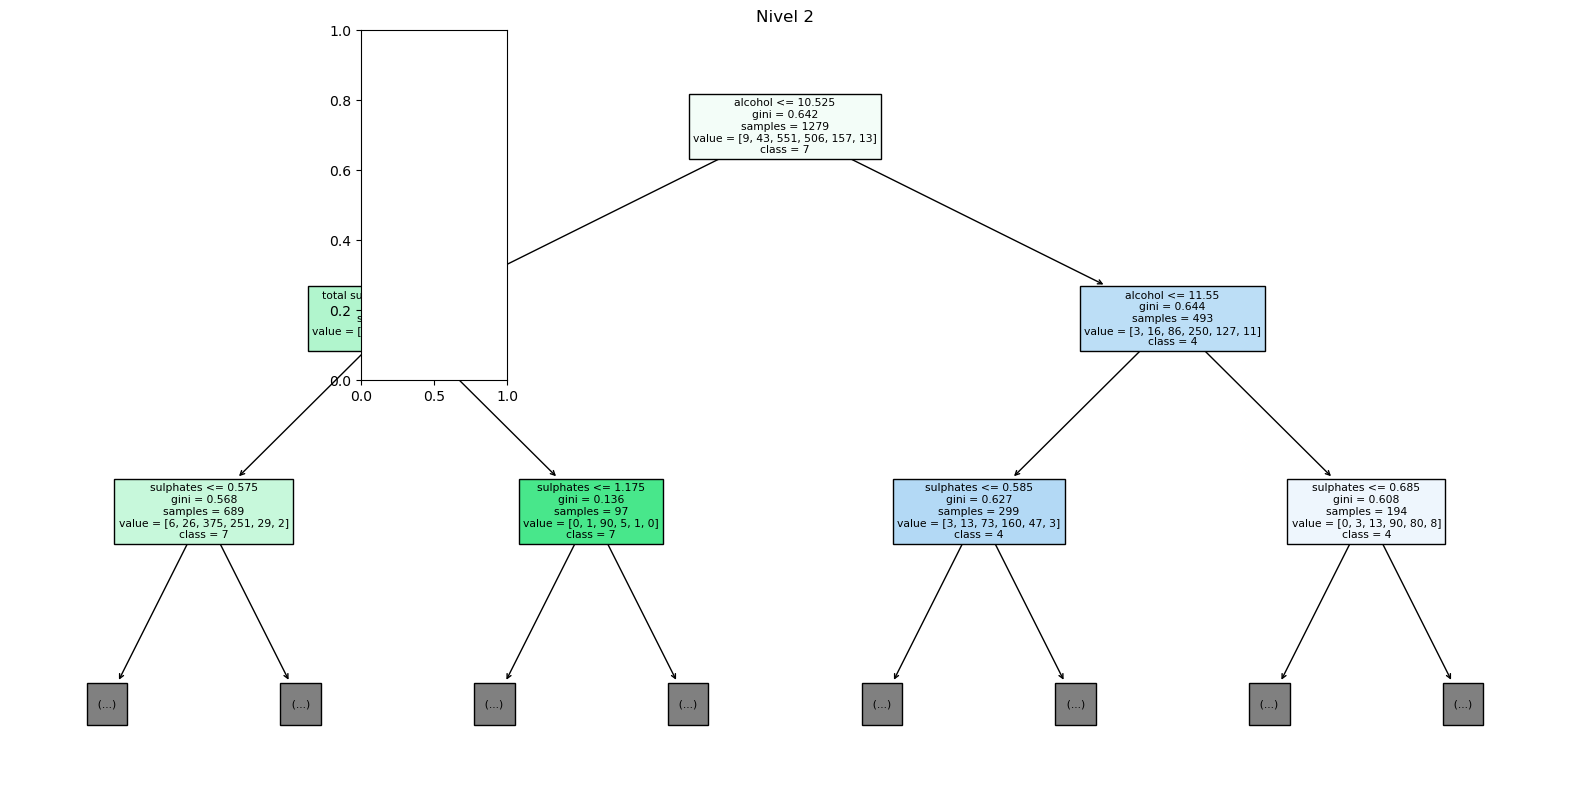

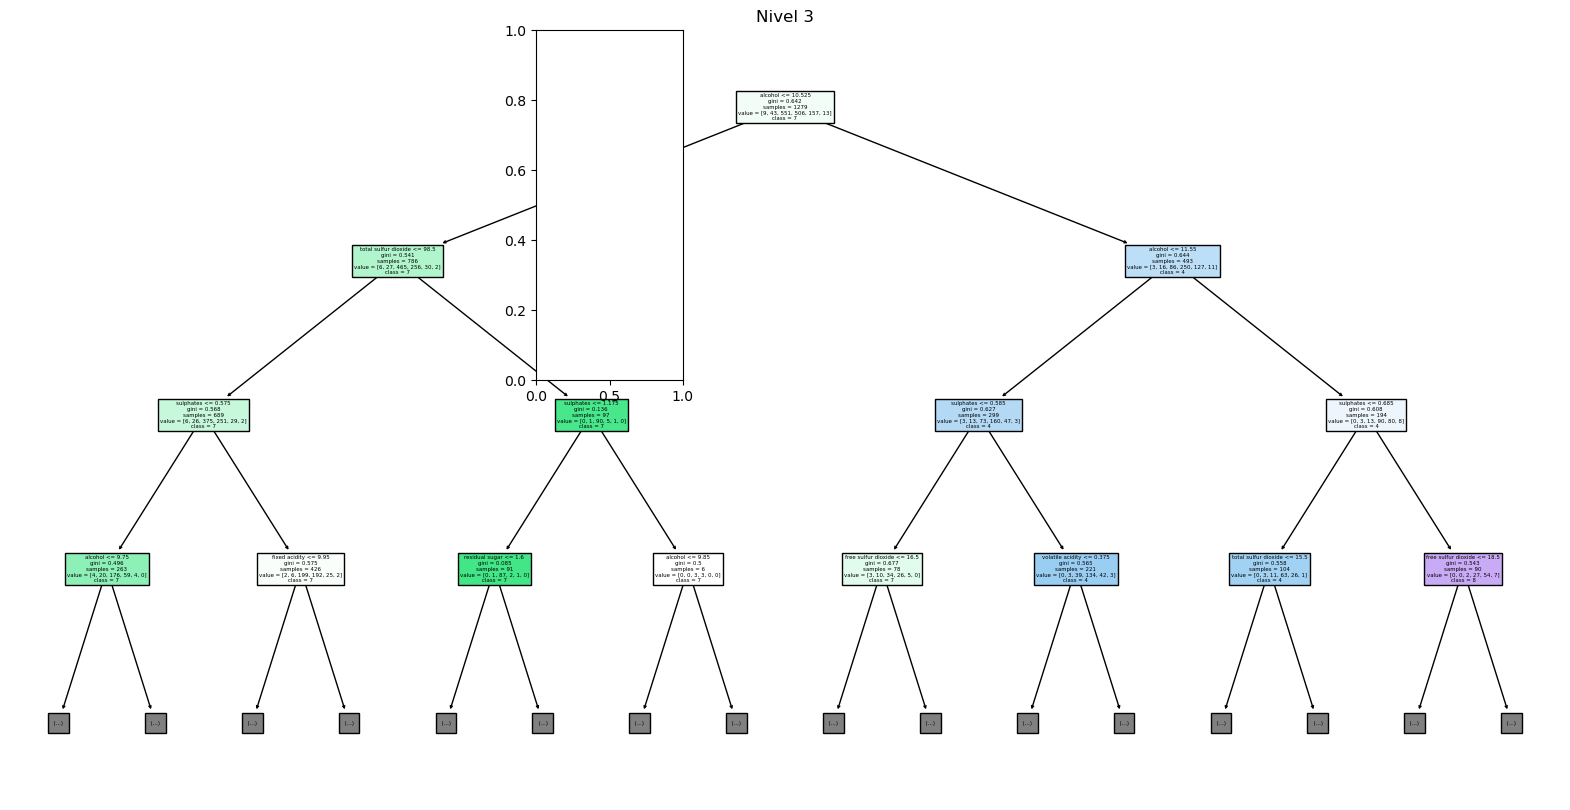

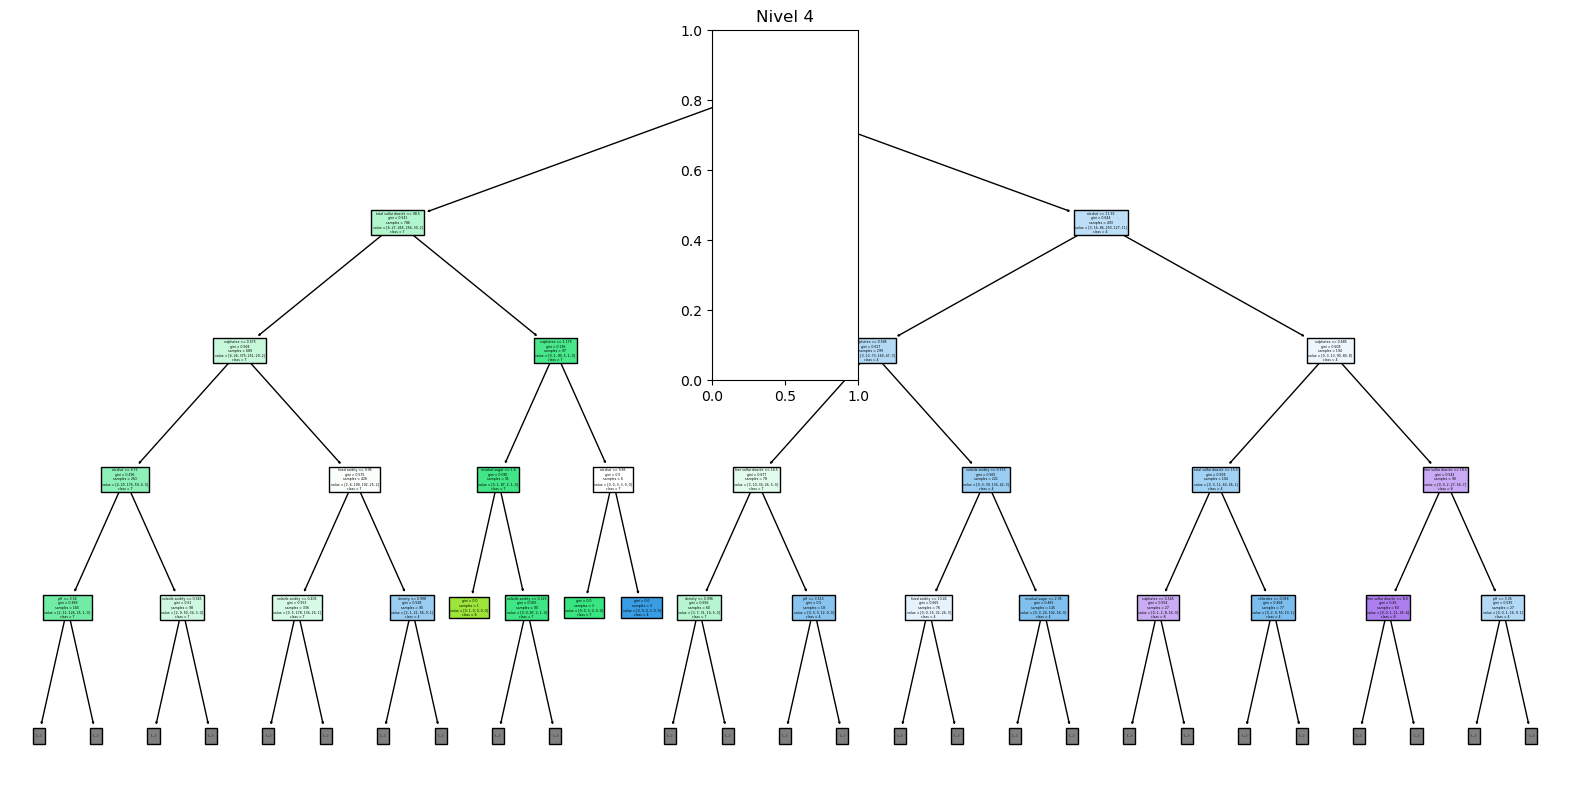

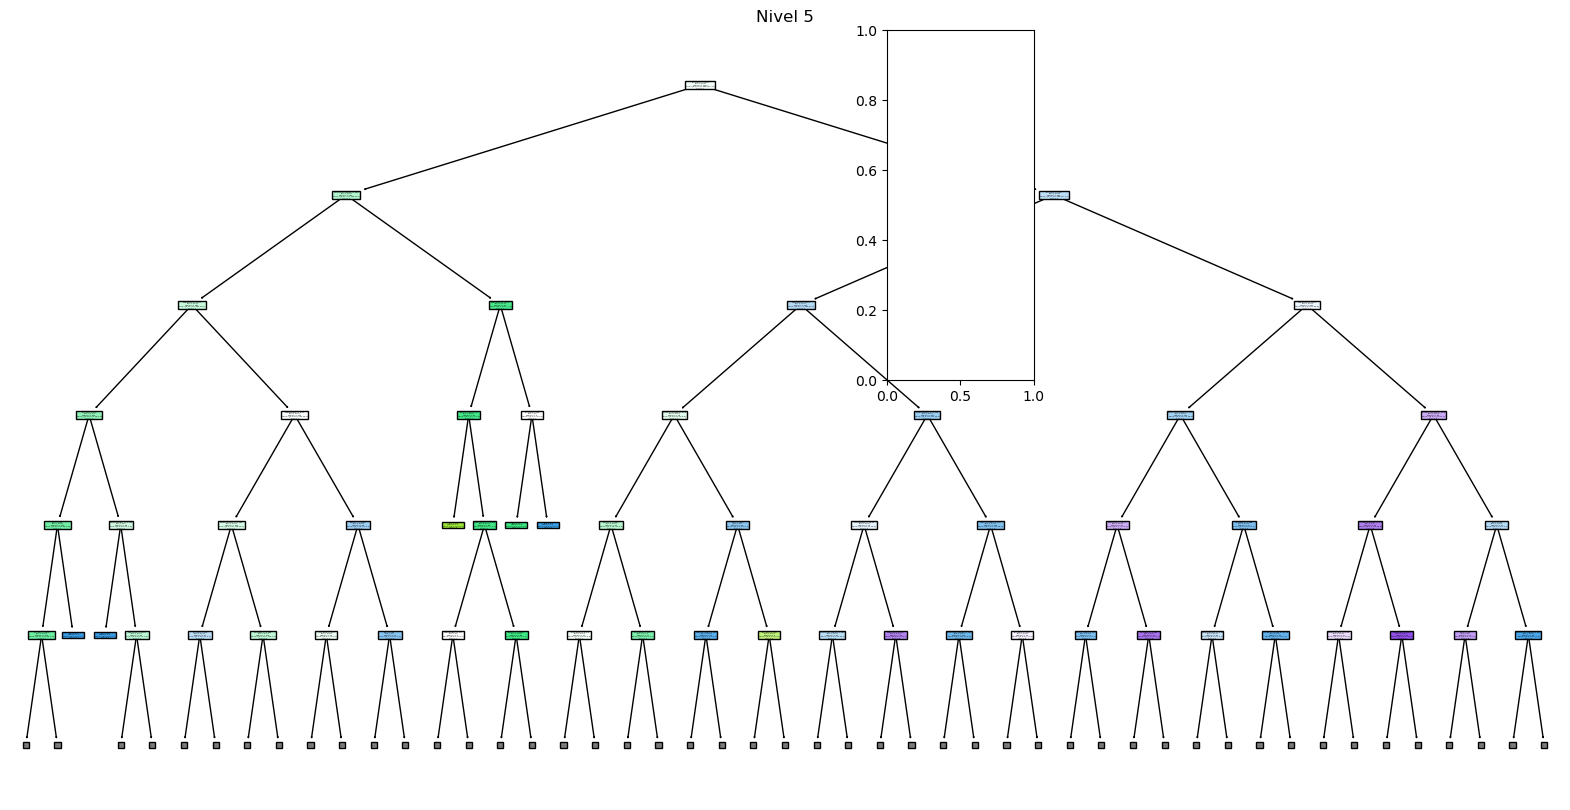

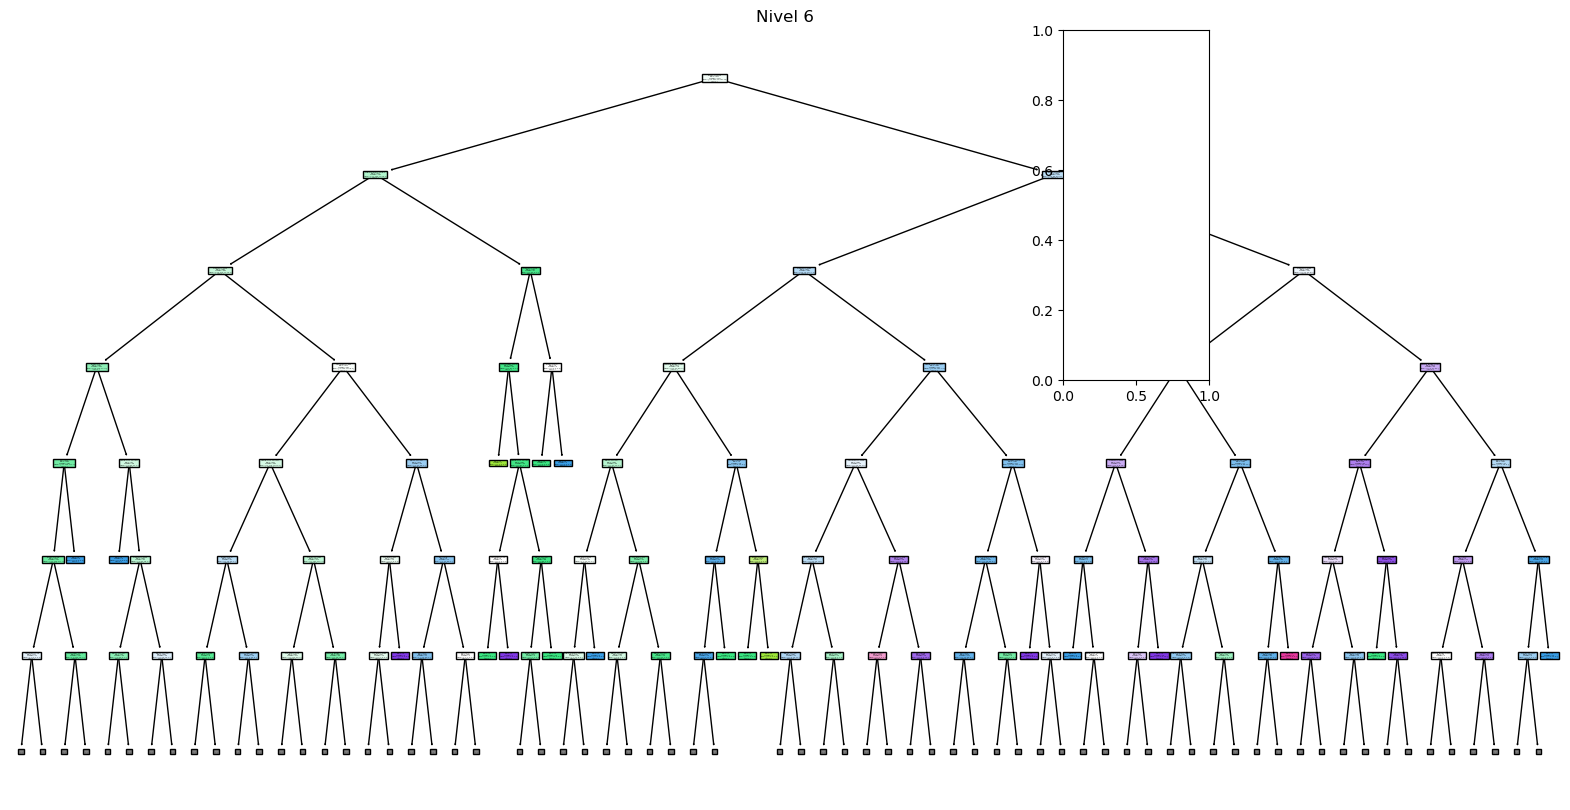

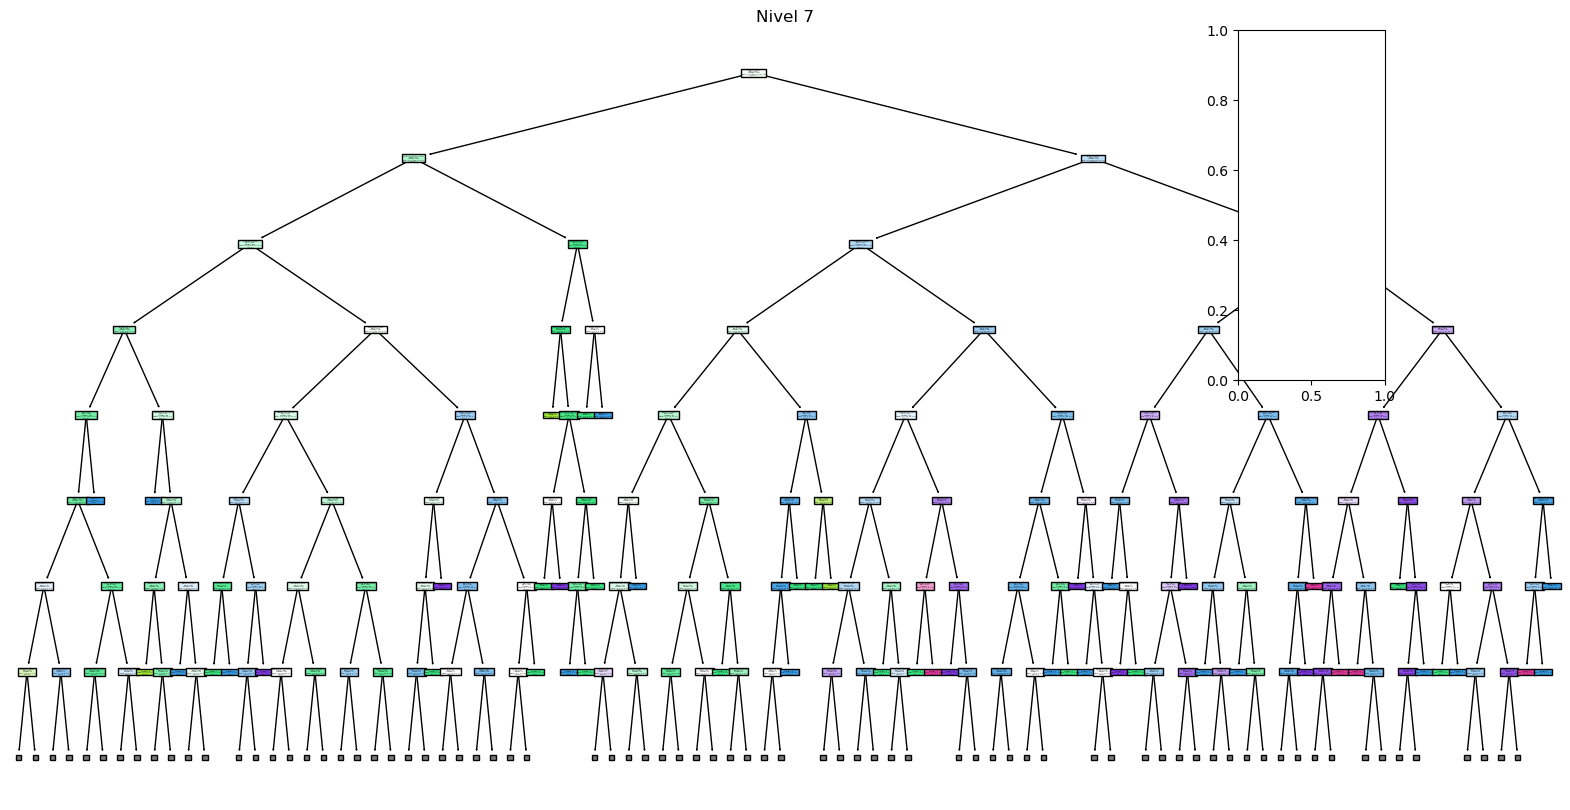

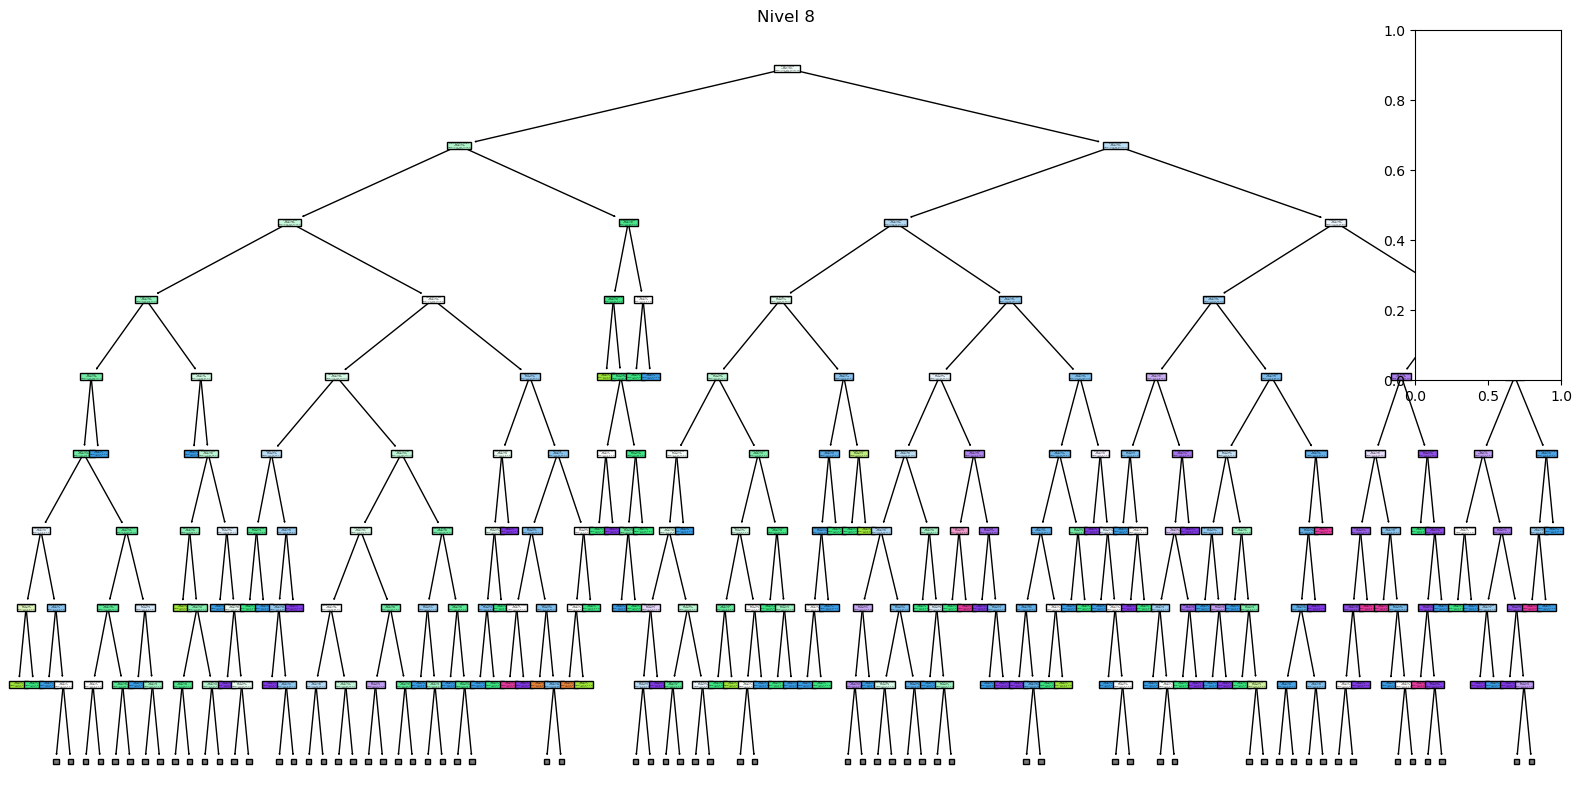

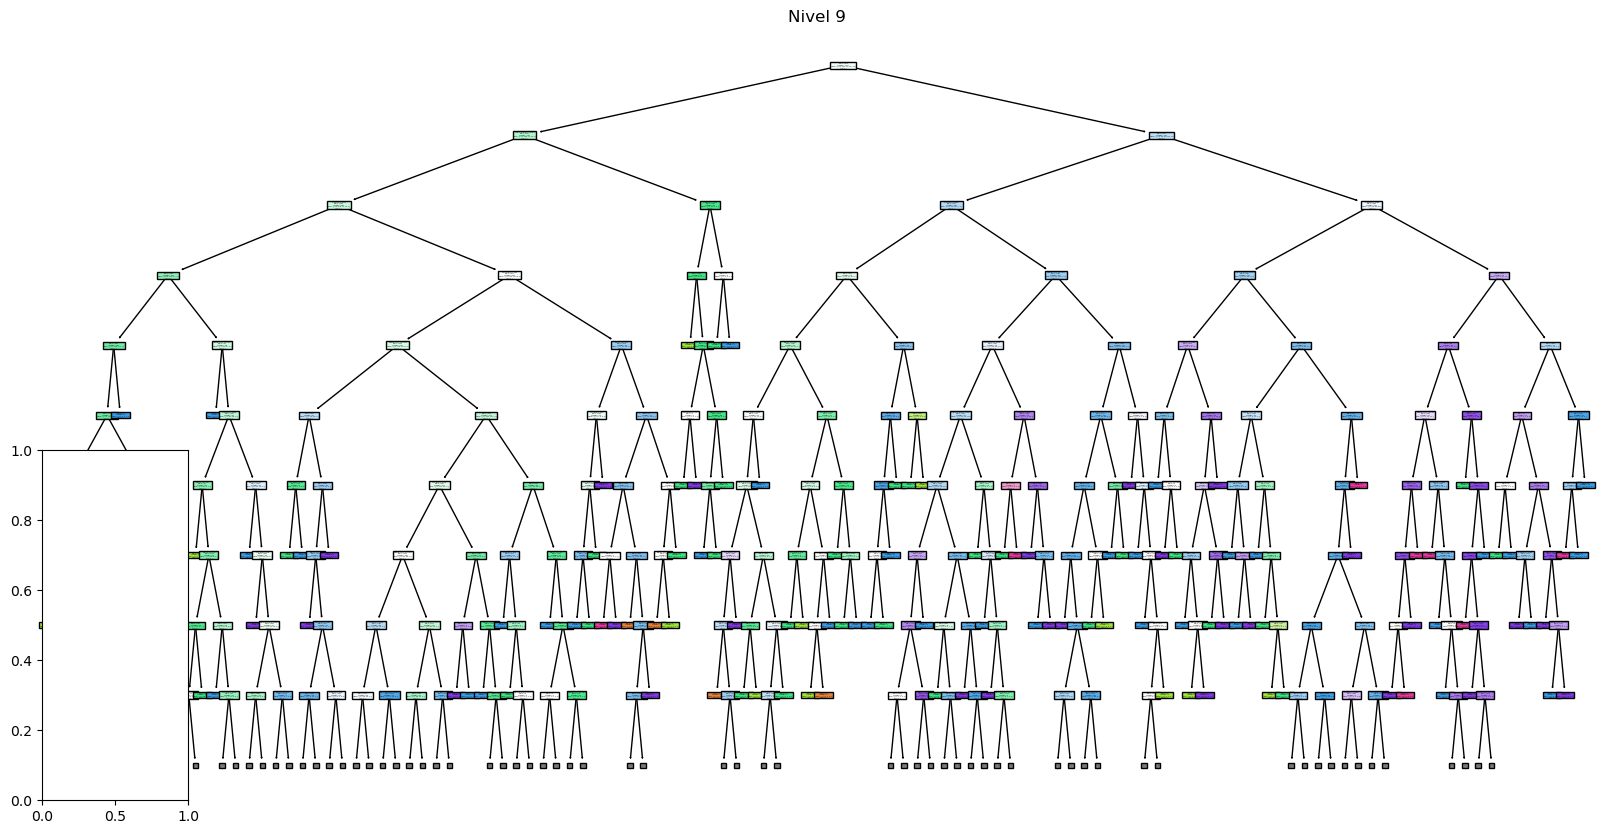

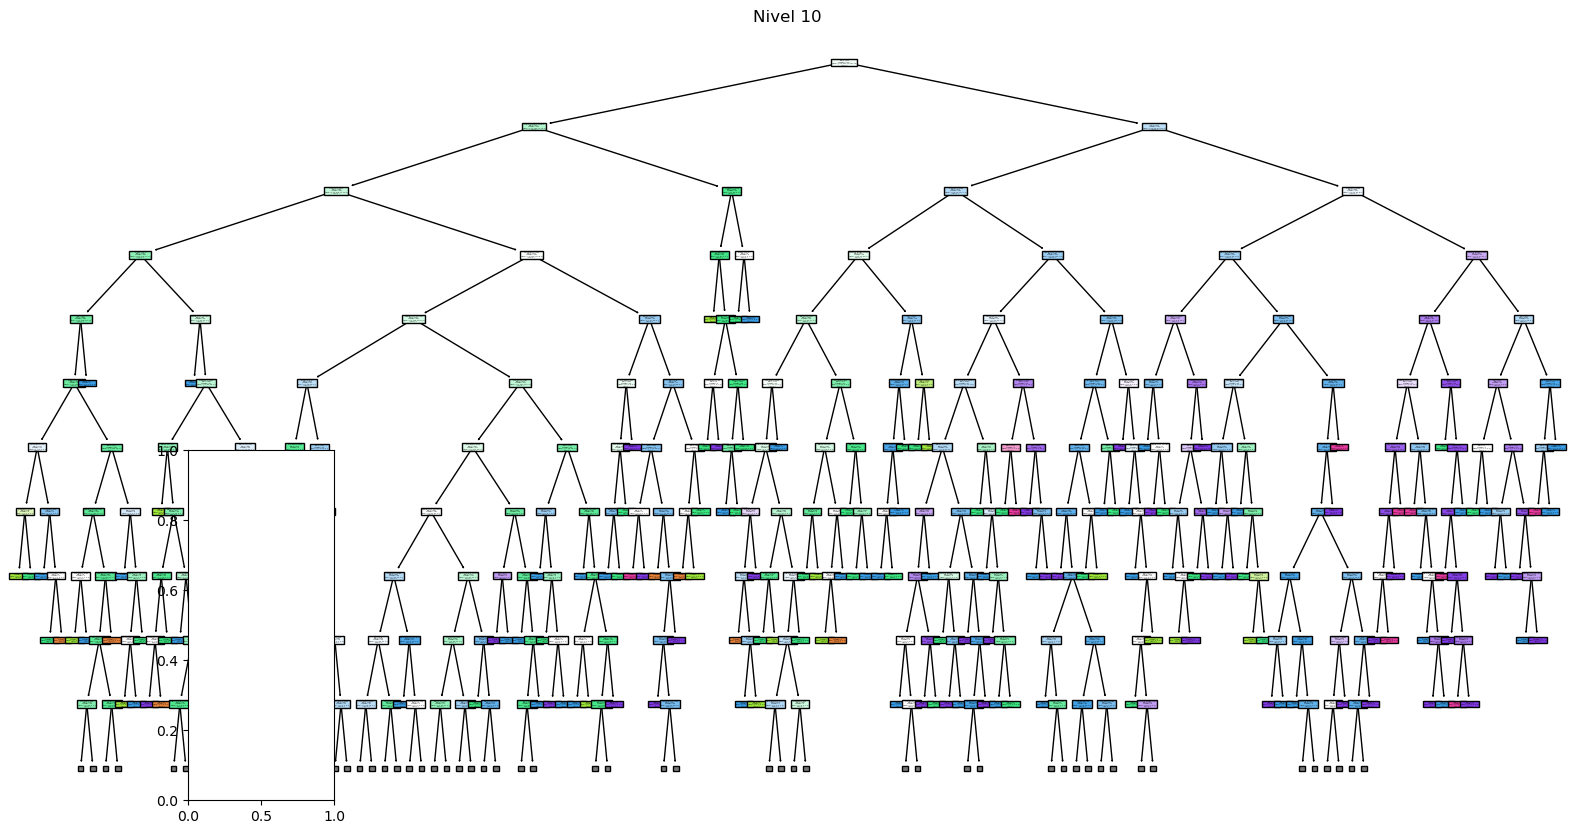

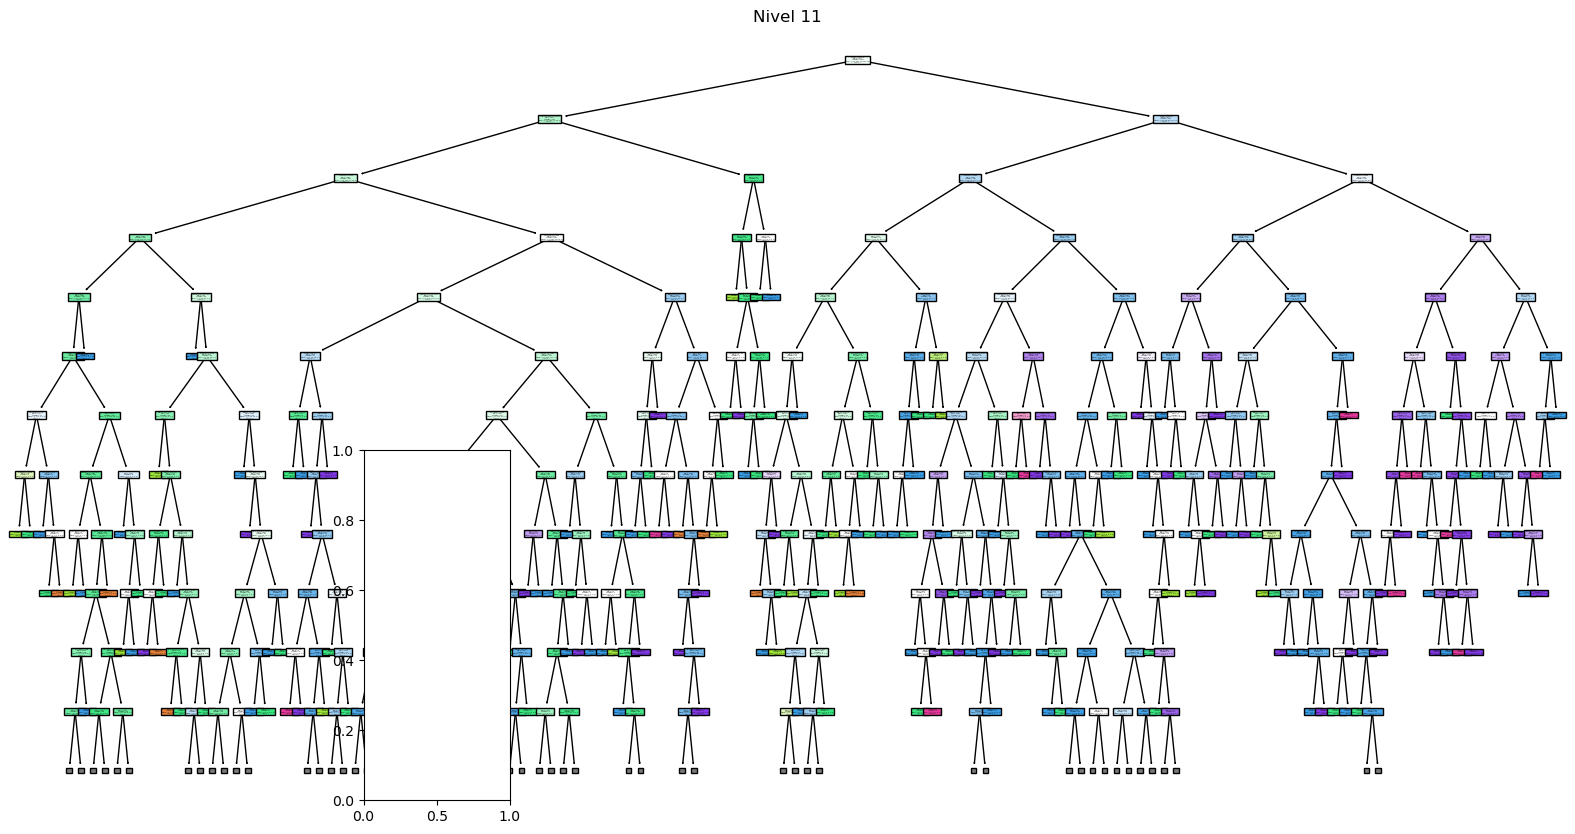

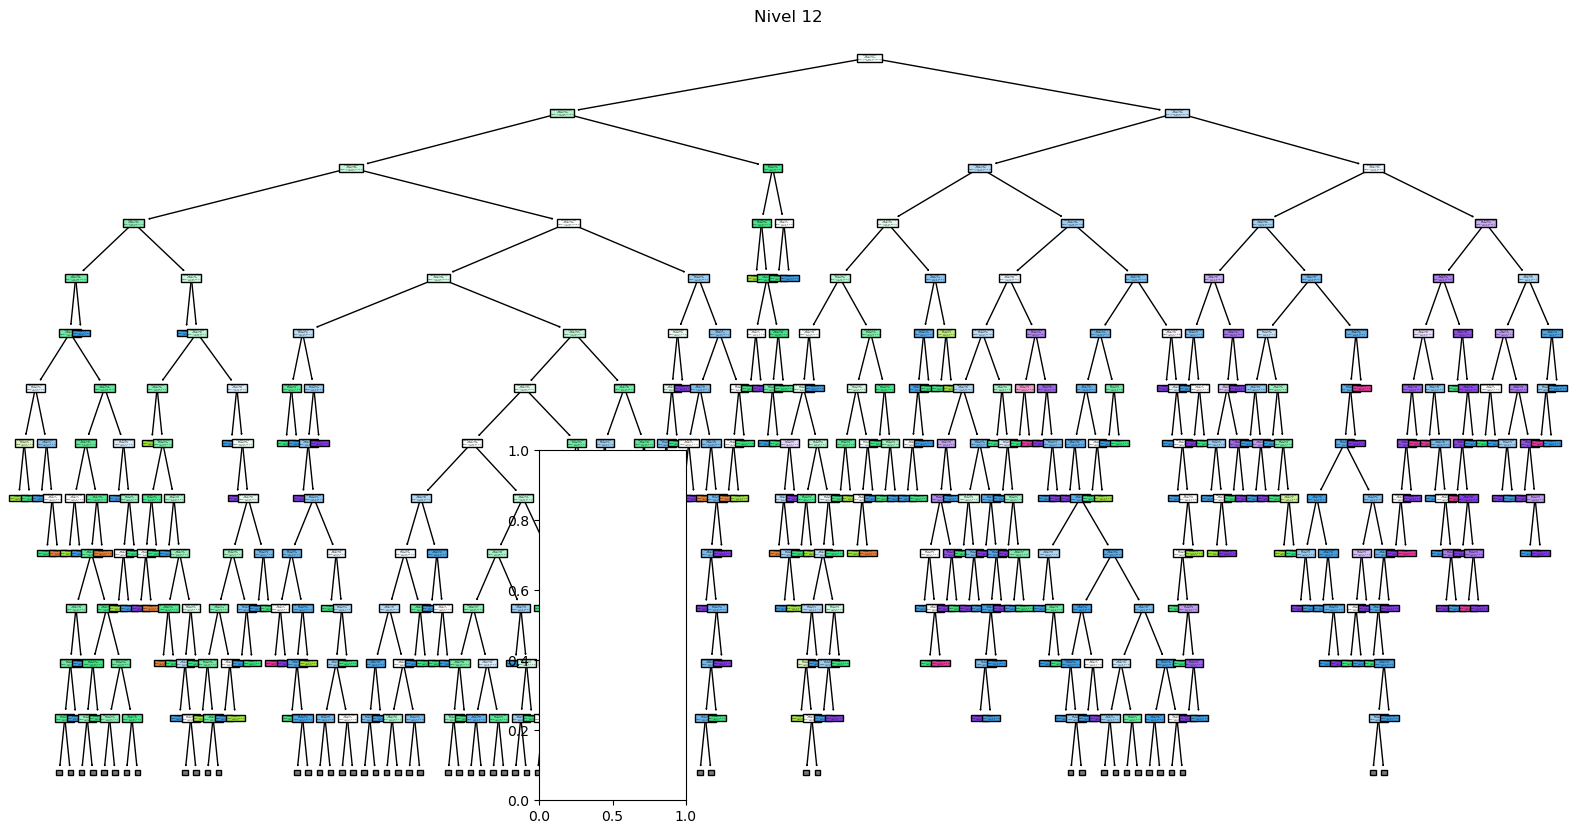

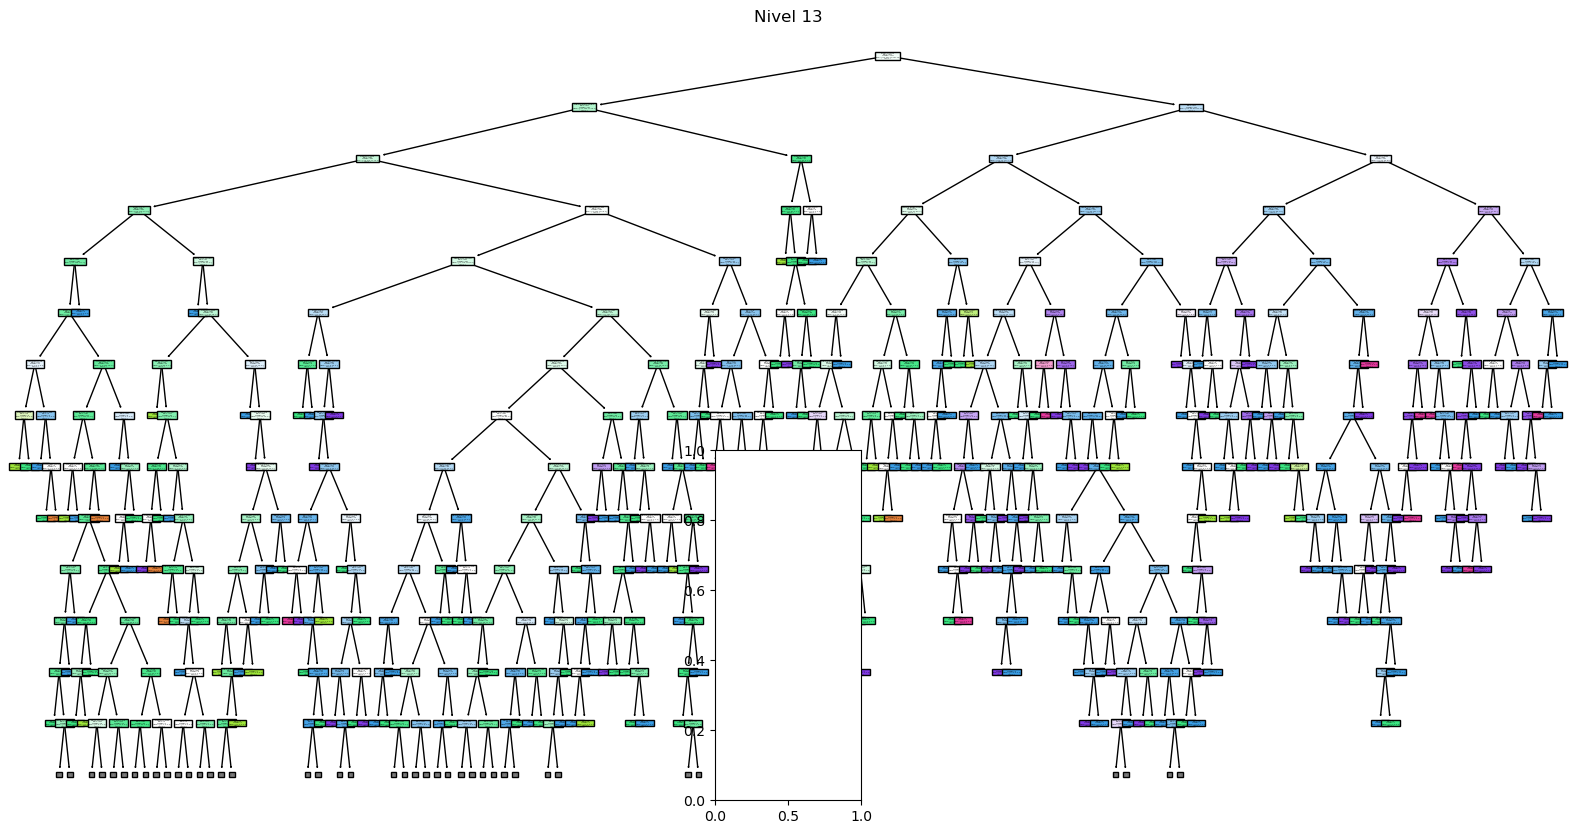

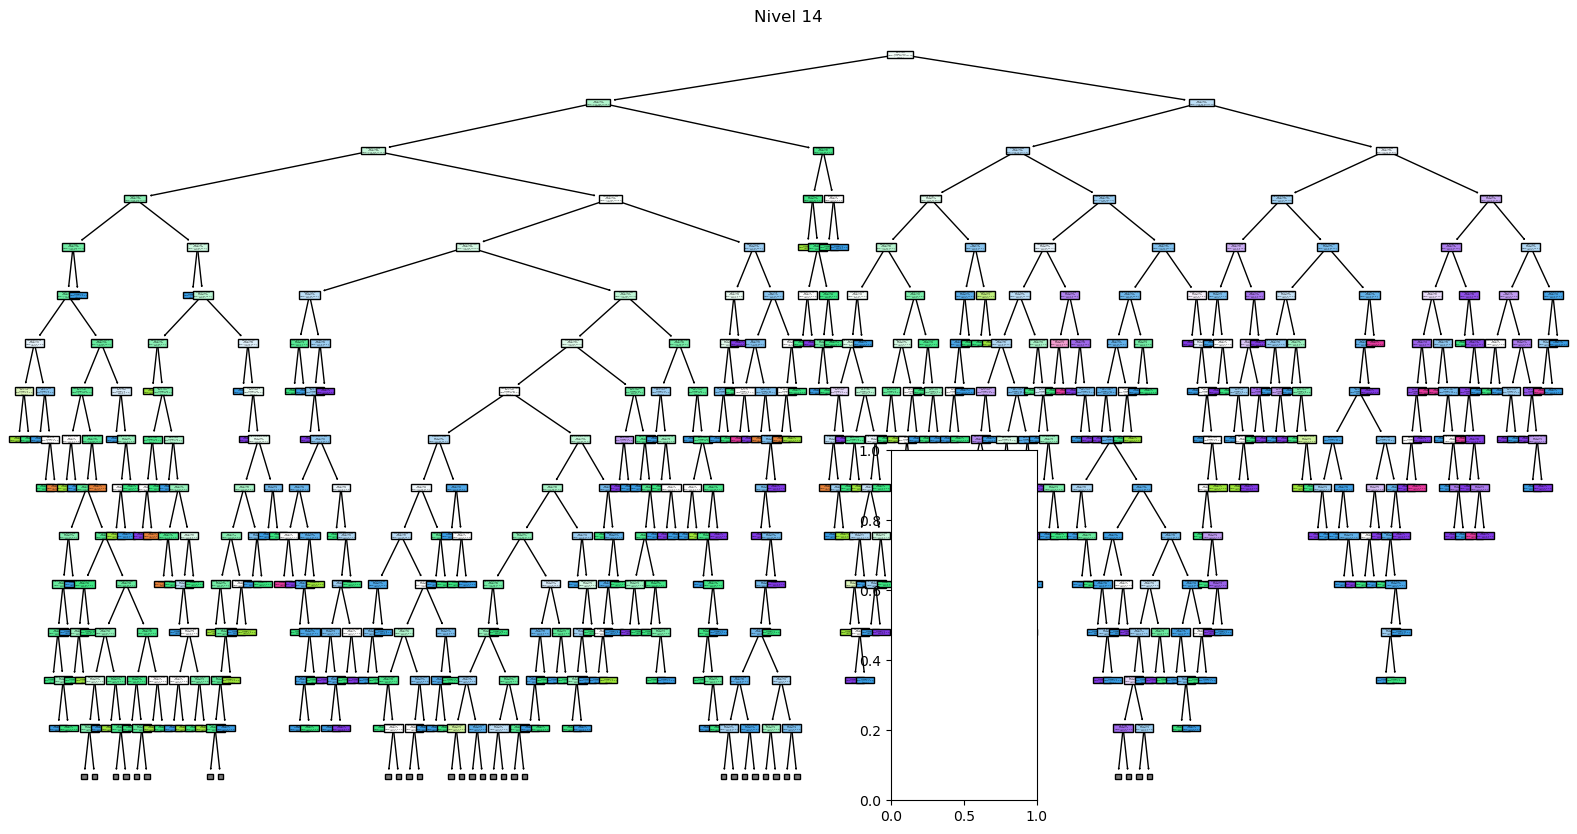

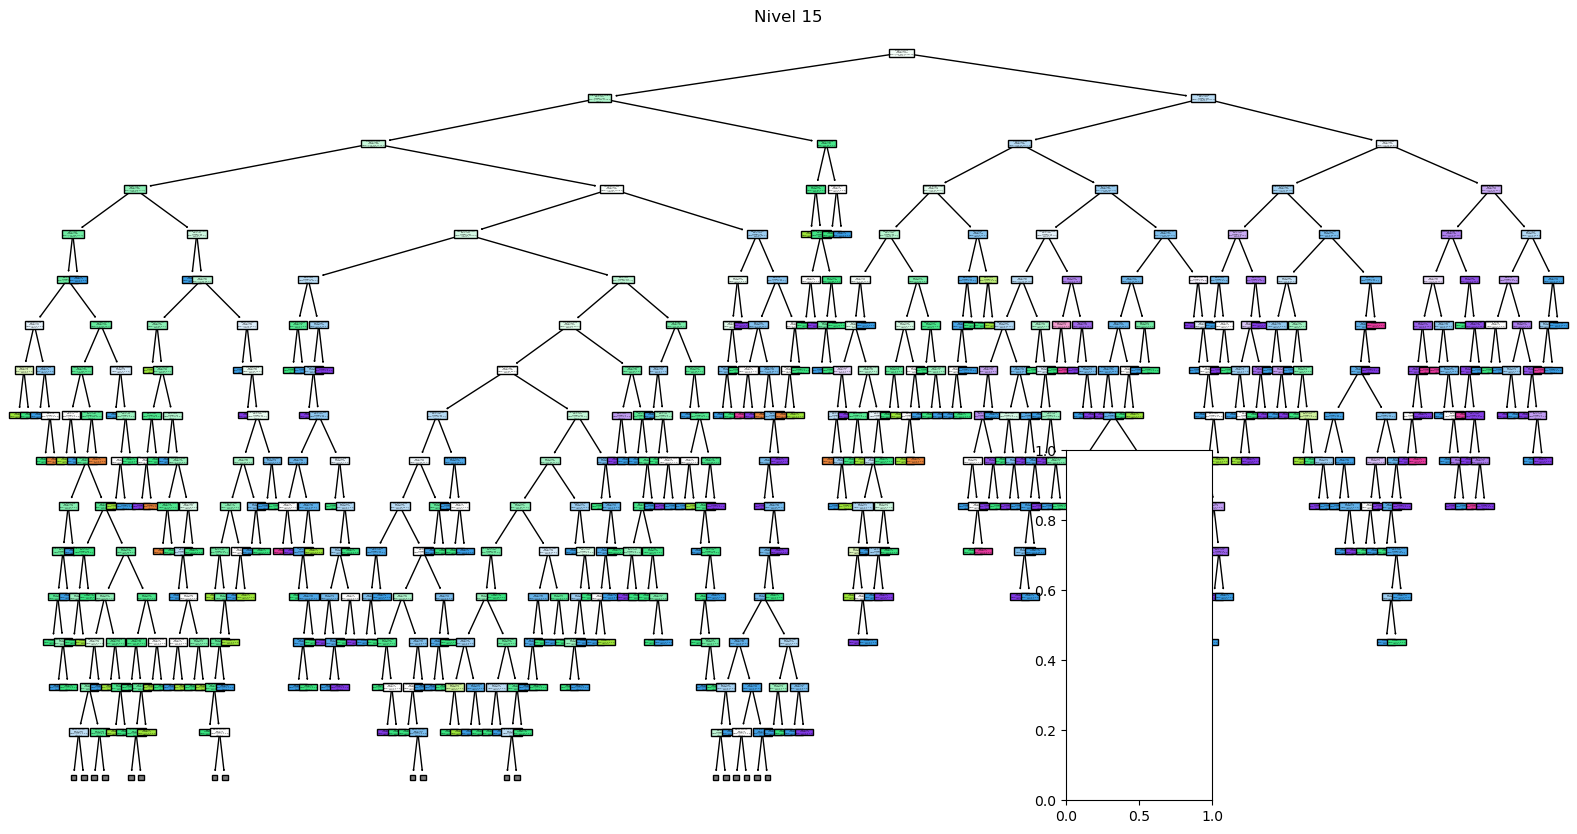

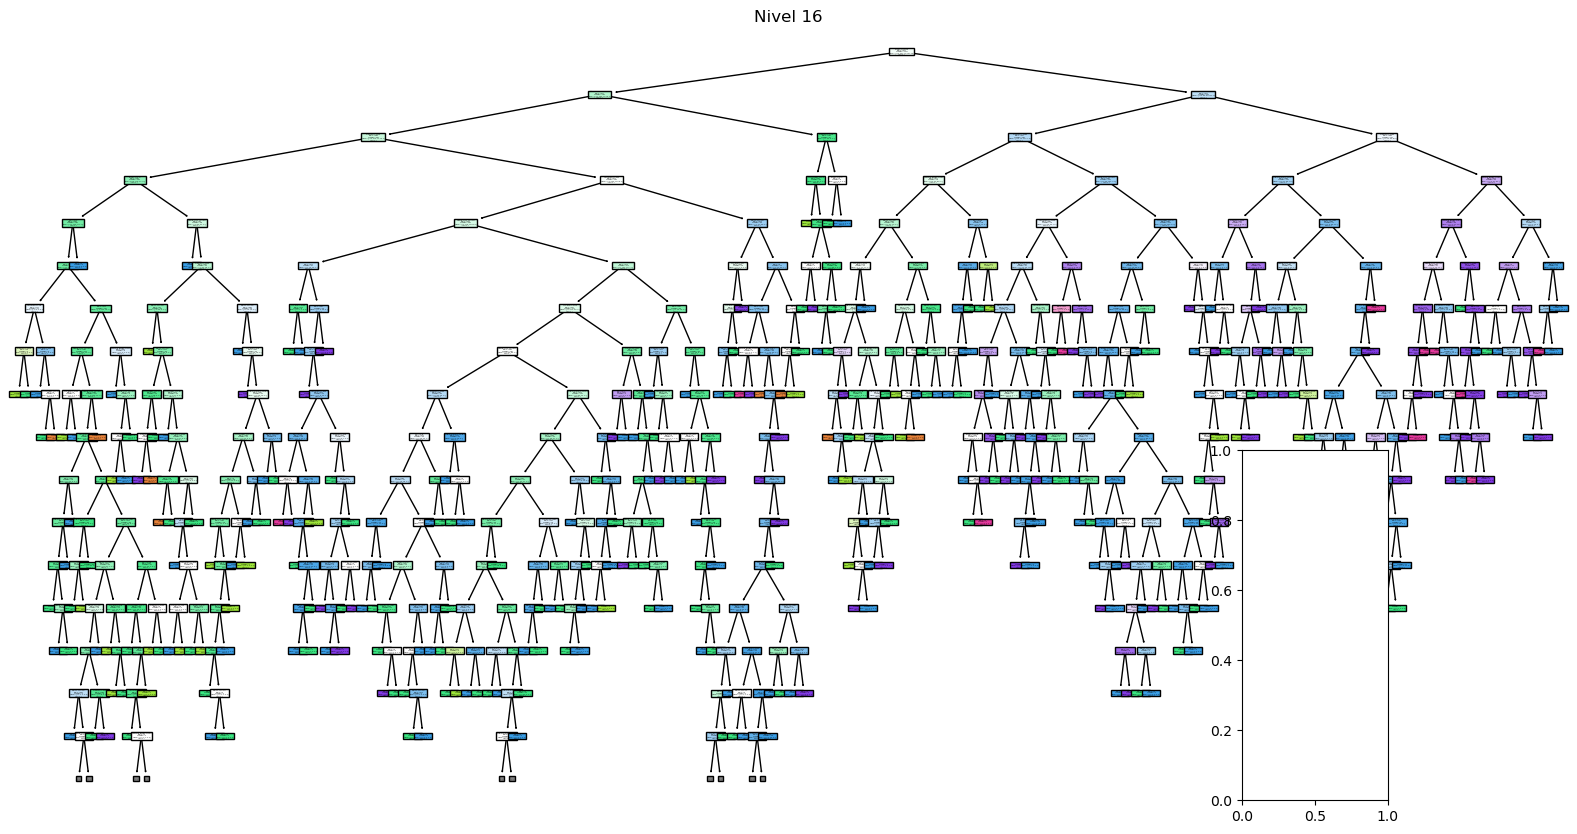

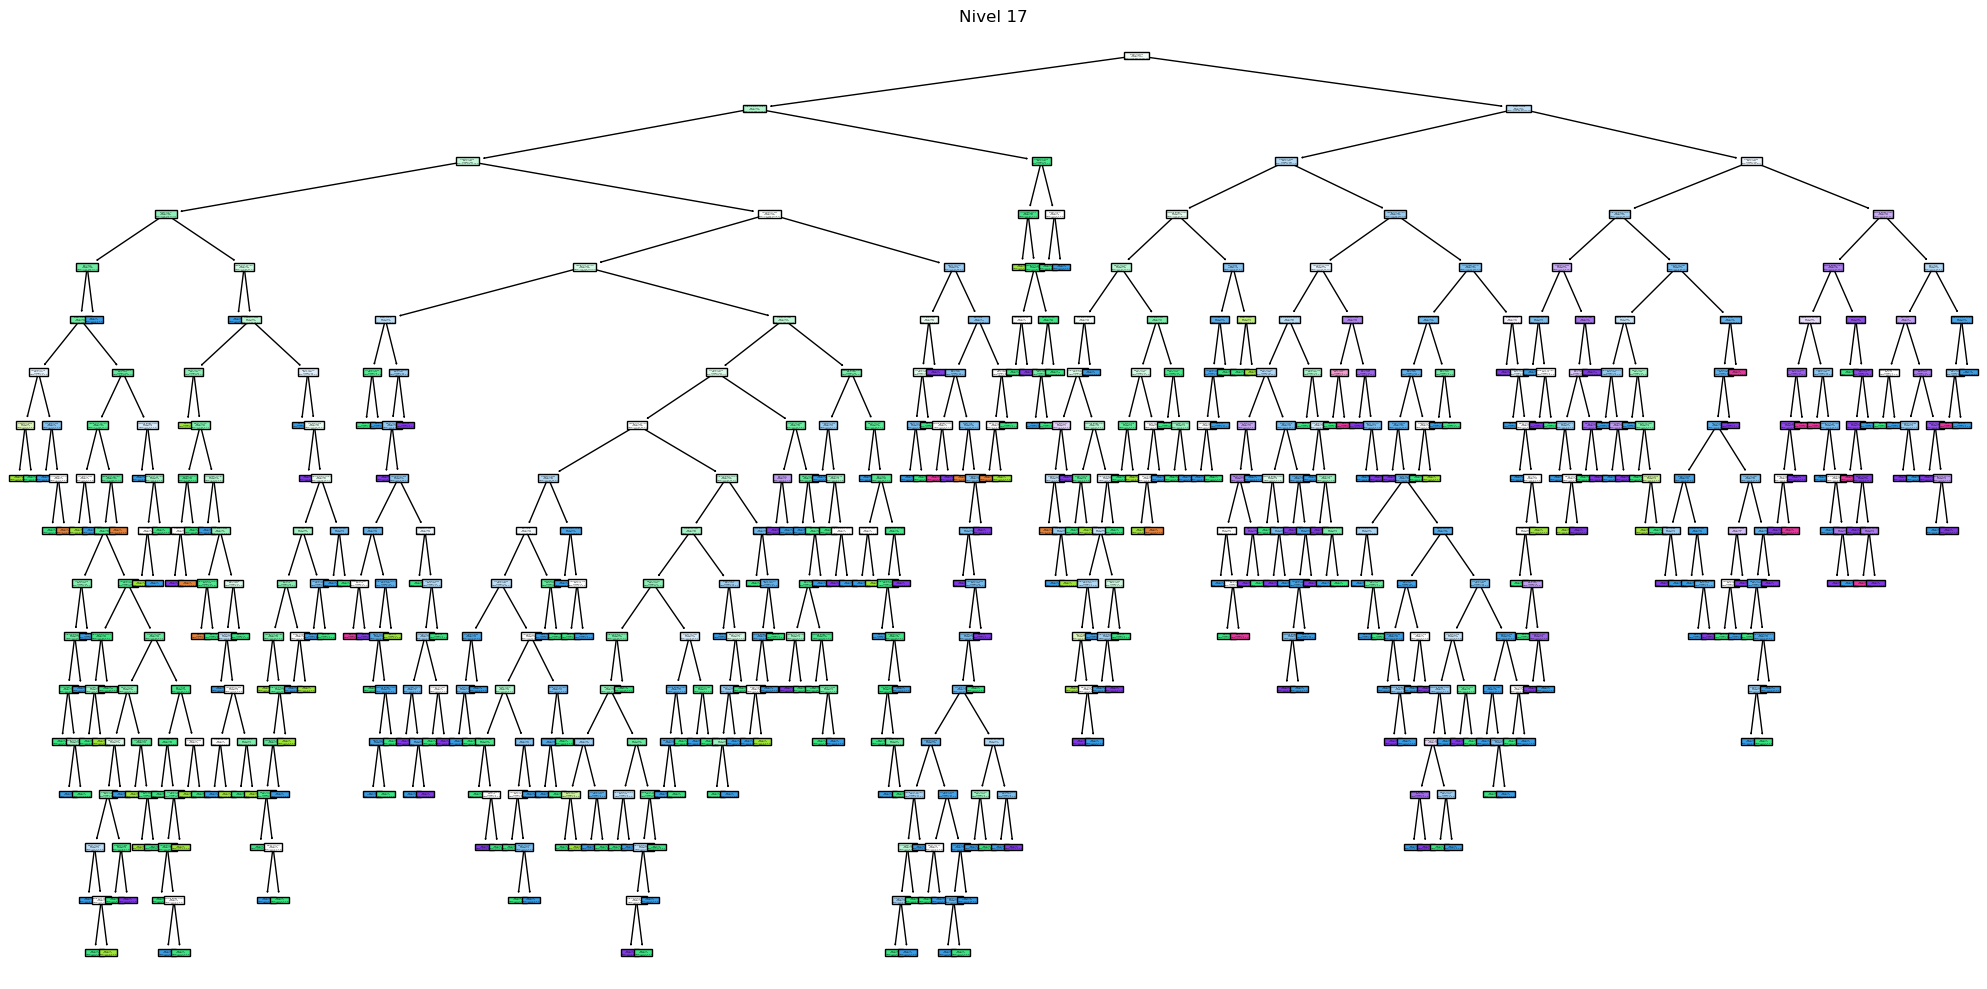

In [50]:
"""CADA NIVEL DEL ARBOL"""
def plot_tree_levels(tree_model, max_depth=None):
    plt.figure(figsize=(20, 10))
    plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=class_names_str, max_depth=max_depth)

"""MAXIMA PROFUNDIDAD"""
max_tree_depth = model.get_depth()

"""GRAFICOS INDIVIDUALES"""
for depth in range(1, max_tree_depth + 1):
    plt.subplot(2, (max_tree_depth + 1) // 2, depth)
    plot_tree_levels(model, max_depth=depth)
    plt.title('Nivel {}'.format(depth))

plt.tight_layout()
plt.show()

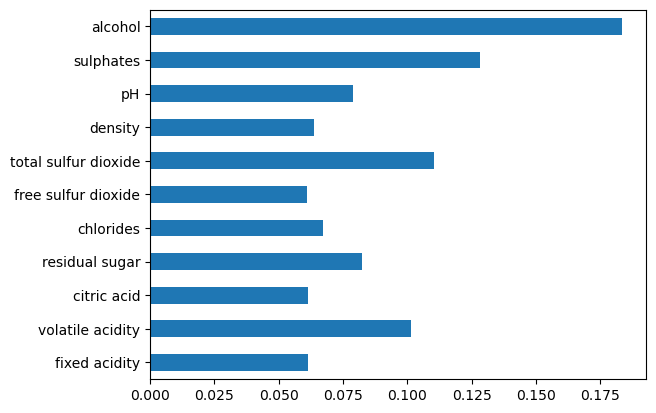

Importancia de las características:
fixed acidity: 0.06136381122460125
volatile acidity: 0.10155668275374027
citric acid: 0.06156645038050467
residual sugar: 0.08226599821405359
chlorides: 0.06734333950819235
free sulfur dioxide: 0.060982112180860554
total sulfur dioxide: 0.11022107778444216
density: 0.06383226157690586
pH: 0.07896289874085531
sulphates: 0.12824385373034627
alcohol: 0.18366151390549762


In [51]:
"""iMPORTANCIA"""
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt


X = df.drop('quality', axis=1) 
y = df['quality']

model = DecisionTreeClassifier()
model.fit(X, y)


feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.plot(kind='barh')
plt.show()


print("Importancia de las características:")
for feature, importance in feature_importance.items():
    print(f"{feature}: {importance}")

Matriz de confusión:
[[ 0  0  0  1  0  0]
 [ 0  0  6  3  1  0]
 [ 1  7 86 33  3  0]
 [ 0  2 42 69 18  1]
 [ 0  2  4 12 23  1]
 [ 0  0  1  2  2  0]]


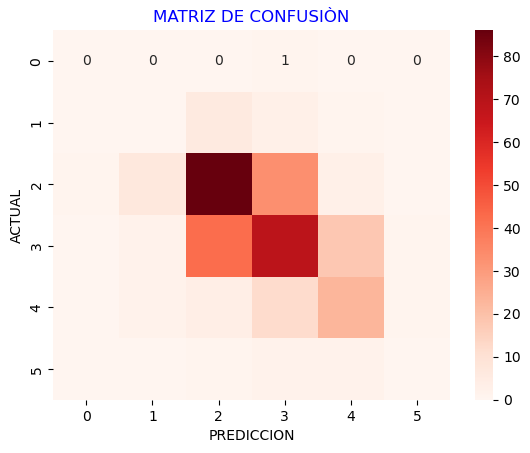

In [62]:
cm = confusion_matrix(y_test, y_pred)

print("Matriz de confusión:")
print(cm)

# Graficar
sns.heatmap(cm, annot=True, cmap='Reds')  # Cambiar el mapa de colores a 'Reds'
plt.xlabel('PREDICCION')
plt.ylabel('ACTUAL')
plt.title('MATRIZ DE CONFUSIÒN', color= "blue")
plt.show()

In [64]:
"""BIBLIOTECA PARA VER EL ARBOL"""
from sklearn.tree import export_text

tree_rules = export_text(model, feature_names=list(X.columns))
print("Reglas del Árbol de Decisión:")
print(tree_rules)

Reglas del Árbol de Decisión:
|--- alcohol <= 10.25
|   |--- sulphates <= 0.57
|   |   |--- total sulfur dioxide <= 98.50
|   |   |   |--- alcohol <= 9.75
|   |   |   |   |--- alcohol <= 9.08
|   |   |   |   |   |--- residual sugar <= 2.05
|   |   |   |   |   |   |--- sulphates <= 0.48
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- sulphates >  0.48
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- residual sugar >  2.05
|   |   |   |   |   |   |--- fixed acidity <= 7.80
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- fixed acidity >  7.80
|   |   |   |   |   |   |   |--- sulphates <= 0.56
|   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |--- sulphates >  0.56
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- alcohol >  9.08
|   |   |   |   |   |--- pH <= 3.54
|   |   |   |   |   |   |--- residual sugar <= 4.40
|   |   |   |   |   |   |   |--- volatile acidity <= 0.23
|   |   |   |

In [ ]:
"""HUMBERTO JOSE RINCON MORA"""